In [122]:
# Dependencies
import csv
import pandas as pd
import os
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress 
import seaborn as sns 
from scipy import stats
import matplotlib.dates as mdates
import scipy.stats as st
from pprint import pprint
from datetime import datetime


In [123]:
# Import the covid-19 dataset 
csv_path = ('Resources/owid-covid-data_updated.csv')
covid_data_df = pd.read_csv(csv_path)
covid_data_df.head(1000)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,ABW,North America,Aruba,9/28/2020,3844,12,41.857,25,0,0.286,...,35973.781,0.0,0.000,11.62,0.000,0.000,0.000,0.000,76.29,0.000
1,AFG,Asia,Afghanistan,9/28/2020,39227,0,26.143,1453,0,1.714,...,1803.987,0.0,597.029,9.59,0.000,0.000,37.746,0.500,64.83,0.498
2,AGO,Africa,Angola,9/28/2020,4672,82,97.286,171,4,2.714,...,5819.495,0.0,276.045,3.94,0.000,0.000,26.664,0.000,61.15,0.581
3,AIA,North America,Anguilla,9/28/2020,3,0,0.000,0,0,0.000,...,0.000,0.0,0.000,0.00,0.000,0.000,0.000,0.000,81.88,0.000
4,ALB,Europe,Albania,9/28/2020,13259,106,124.857,377,2,2.143,...,11803.431,1.1,304.195,10.08,7.100,51.200,0.000,2.890,78.57,0.785
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,YEM,Asia,Yemen,9/28/2020,2034,1,0.571,588,0,0.286,...,1479.147,18.8,495.003,5.35,7.600,29.200,49.542,0.700,66.12,0.452
204,ZAF,Africa,South Africa,9/28/2020,670766,1268,1365.000,16398,22,63.571,...,12294.876,18.9,200.380,5.52,8.100,33.200,43.993,2.320,64.13,0.699
205,ZMB,Africa,Zambia,9/28/2020,14641,29,72.857,332,0,0.286,...,3689.251,57.5,234.499,3.94,3.100,24.700,13.938,2.000,63.89,0.588
206,ZWE,Africa,Zimbabwe,9/28/2020,7812,9,18.429,227,0,0.286,...,1899.775,21.4,307.846,1.82,1.600,30.700,36.791,1.700,61.49,0.535


In [119]:
#Drop cells containing NaN
covid_data_clean = covid_data_df.dropna()
covid_data_clean
                               

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,ABW,North America,Aruba,9/28/2020,3844,12,41.857,25,0,0.286,...,35973.781,0.0,0.000,11.62,0.000,0.000,0.000,0.000,76.29,0.000
1,AFG,Asia,Afghanistan,9/28/2020,39227,0,26.143,1453,0,1.714,...,1803.987,0.0,597.029,9.59,0.000,0.000,37.746,0.500,64.83,0.498
2,AGO,Africa,Angola,9/28/2020,4672,82,97.286,171,4,2.714,...,5819.495,0.0,276.045,3.94,0.000,0.000,26.664,0.000,61.15,0.581
3,AIA,North America,Anguilla,9/28/2020,3,0,0.000,0,0,0.000,...,0.000,0.0,0.000,0.00,0.000,0.000,0.000,0.000,81.88,0.000
4,ALB,Europe,Albania,9/28/2020,13259,106,124.857,377,2,2.143,...,11803.431,1.1,304.195,10.08,7.100,51.200,0.000,2.890,78.57,0.785
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,YEM,Asia,Yemen,9/28/2020,2034,1,0.571,588,0,0.286,...,1479.147,18.8,495.003,5.35,7.600,29.200,49.542,0.700,66.12,0.452
204,ZAF,Africa,South Africa,9/28/2020,670766,1268,1365.000,16398,22,63.571,...,12294.876,18.9,200.380,5.52,8.100,33.200,43.993,2.320,64.13,0.699
205,ZMB,Africa,Zambia,9/28/2020,14641,29,72.857,332,0,0.286,...,3689.251,57.5,234.499,3.94,3.100,24.700,13.938,2.000,63.89,0.588
206,ZWE,Africa,Zimbabwe,9/28/2020,7812,9,18.429,227,0,0.286,...,1899.775,21.4,307.846,1.82,1.600,30.700,36.791,1.700,61.49,0.535


In [74]:
#
# Total # of cases worldwide
#
total_cases_na = covid_data_clean["total_cases"].sum()
total_cases_na


65547938

In [75]:
# just get USA dataframe
covid_data_clean_usa = covid_data_clean.loc[covid_data_clean['location'] == 'United States']
covid_data_clean_usa

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
194,USA,North America,United States,9/28/2020,7115046,36248,44318.857,204756,259,749.571,...,54225.446,1.2,151.089,10.79,19.1,24.6,0.0,2.77,78.86,0.924


In [76]:
# check Austraia 
covid_data_clean_aust = covid_data_clean.loc[covid_data_clean['location'] == 'Australia']

covid_data_clean_aust

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
10,AUS,Oceania,Australia,9/28/2020,27040,24,20.286,872,2,3.286,...,44648.71,0.5,107.791,5.07,13.0,16.5,0.0,3.84,83.44,0.939


In [67]:
# Main DataFrame to be used for analysis
#
covid_data_clean_df_analysis = covid_data_clean[["continent", "location", "date", "population", "total_cases", 
                 "total_deaths", "gdp_per_capita", "cardiovasc_death_rate", 
                "diabetes_prevalence"]]

covid_data_clean_df_analysis.head(100)

,continent,location,date,population,total_cases,total_deaths,gdp_per_capita,cardiovasc_death_rate,diabetes_prevalence
0,North America,Aruba,9/28/2020,106766,3844,25,35973.781,0.000,11.62
1,Asia,Afghanistan,9/28/2020,38928341,39227,1453,1803.987,597.029,9.59
2,Africa,Angola,9/28/2020,32866268,4672,171,5819.495,276.045,3.94
3,North America,Anguilla,9/28/2020,15002,3,0,0.000,0.000,0.00
4,Europe,Albania,9/28/2020,2877800,13259,377,11803.431,304.195,10.08
...,...,...,...,...,...,...,...,...,...
95,Europe,Italy,9/28/2020,60461828,309870,35835,35220.084,113.151,4.78
96,North America,Jamaica,9/28/2020,2961161,5993,89,8193.571,206.537,11.28
97,Europe,Jersey,9/28/2020,101073,400,32,0.000,0.000,0.00
98,Asia,Jordan,9/28/2020,10203140,8492,45,8337.490,208.257,11.75


In [79]:
# Get total # of cases by continent
total_cases_group = covid_data_clean.groupby(["continent"])["total_cases"].sum()
total_cases_group = pd.DataFrame(total_cases_group)
total_cases_group.head()


,total_cases
continent,
0,33178019
Africa,1461036
Asia,10350161
Europe,4040576
North America,8575751


In [78]:
# Get total # of death by continent
total_death_group = covid_data_clean.groupby(["continent"])["total_deaths"].sum()
total_death_group = pd.DataFrame(total_death_group)
total_death_group


,total_deaths
continent,
0,998784
Africa,35160
Asia,189891
Europe,183438
North America,303569
Oceania,955
South America,248652


In [35]:
# merge dataframe of total cases and total death in each continent
#
merge_cases_df = pd.merge(total_cases_group,total_death_group, how="inner",on = "continent")
merge_cases_df.head()


,new_cases,new_deaths
continent,,
0,259936,3633
Africa,7582,119
Asia,124258,1705
Europe,43307,345
North America,44856,494


In [36]:
# Create dataframe for "gdp_per_capita" per country
#
covid_data_clean_df = pd.DataFrame(covid_data_clean)
covid_data_clean_df = covid_data_clean_df.sort_values('location', ascending=True)
covid_data_clean_df = covid_data_clean_df.drop_duplicates(subset='location', keep='first')
df_gdp = covid_data_clean_df[['location','gdp_per_capita']]
df_gdp

,location,gdp_per_capita
1,Afghanistan,1803.987
4,Albania,11803.431
55,Algeria,13913.839
5,Andorra,0.000
2,Angola,5819.495
...,...,...
59,Western Sahara,0.000
207,World,15469.207
203,Yemen,1479.147
205,Zambia,3689.251


In [113]:
#latest_case_date = covid_data_clean.drop_duplicates(subset='date', keep='last')['date']
latest_case_date = covid_data_clean.iloc[0]['date']
latest_case_date

'9/28/2020'

In [114]:
# Get total # of cases by continent
# group all the cases by continent
total_new_cases_groupby_cont = covid_data_clean.groupby(["continent"])["new_cases"].sum()

# group all deaths by continent
total_new_death_groupby_cont = covid_data_clean.groupby(["continent"])["new_deaths"].sum()

# merge dataframe of total cases and total death in each continent
#
total_merge_cases_by_continent = pd.merge(total_new_cases_groupby_cont, total_new_death_groupby_cont, 
                          how="inner", on = "continent")

print (f"Total number of COVID-19: new cases and new deaths by Continent on:", latest_case_date )
total_merge_cases_by_continent.head()


Total number of COVID-19: new cases and new deaths by Continent on: 9/28/2020


,new_cases,new_deaths
continent,,
0,259936,3633
Africa,7582,119
Asia,124258,1705
Europe,43307,345
North America,44856,494


In [115]:
# Get total # of cases by country

new_cases_group_country = covid_data_clean.groupby(['location'])["new_cases"].sum()
new_death_group_country = covid_data_clean.groupby(['location'])["new_deaths"].sum()

total_cases_group_country = pd.merge(new_cases_group_country, new_death_group_country, 
                                     how="inner", on = "location")

total_cases_df_gdp = pd.merge(total_cases_group_country, df_gdp, how="inner", on = "location")

print ("Total number of COVID-19: new cases and new deaths by Country on:", latest_case_date ) 

#total_cases_group_country.head(200)

total_cases_df_gdp.head(200)


Total number of COVID-19: new cases and new deaths by Country on: 9/28/2020


,location,new_cases,new_deaths,gdp_per_capita
0,Afghanistan,0,0,1803.987
1,Albania,106,2,11803.431
2,Algeria,153,3,13913.839
3,Andorra,0,0,0.000
4,Angola,82,4,5819.495
...,...,...,...,...
195,United Kingdom,5692,17,39753.244
196,United States,36248,259,54225.446
197,United States Virgin Islands,0,0,0.000
198,Uruguay,10,0,20551.409


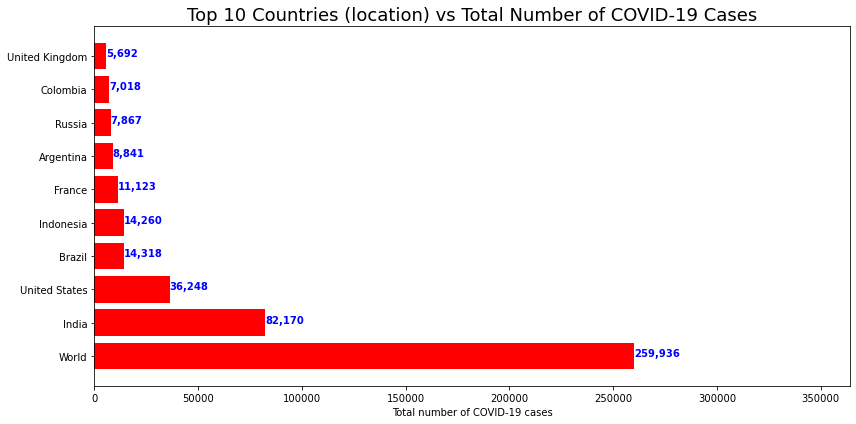

In [39]:
# Plot total number of COVID-19 cases in top 10 countries 
#
# sorting data by top 10 countries that has highest # of cases 
sorted_by_cases_gdp = total_cases_df_gdp.sort_values(by='new_cases', ascending = False)

# get the data for plotting 
# get the data for plotting the top 10 movies by revenue

top_10_data_to_plot_df = sorted_by_cases_gdp[:10][['location','new_cases',
                                                   'new_deaths','gdp_per_capita']].reset_index()

total_cases_value = top_10_data_to_plot_df.new_cases
x_title_labels = top_10_data_to_plot_df.location

y_total_cases = np.arange(len(x_title_labels))

plt.figure(figsize=(12,6))
plt.barh(y_total_cases, total_cases_value, align='center', height=0.8, color="red")

plt.yticks(y_total_cases, x_title_labels)
plt.xlim(0,np.max(total_cases_value)*1.4)
plt.xlabel('Total number of COVID-19 cases')
plt.title('Top 10 Countries (location) vs Total Number of COVID-19 Cases', fontsize = 18)

for i, v in enumerate(total_cases_value):
   plt.text(v + 0.5, i, str(('{:,.0f}'.format(v))), color='blue', fontweight='bold')

plt.tight_layout()

# Save it
plt.savefig("To_10_Countries-COVID-19-Cases.png")

plt.show()

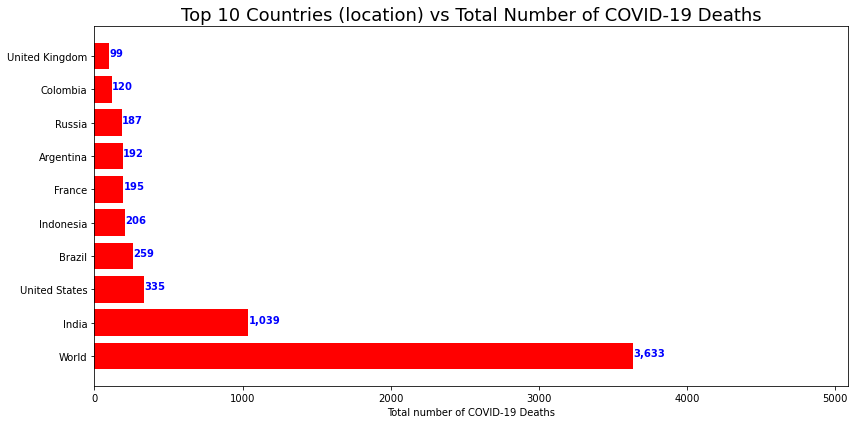

In [40]:
# Plot total number of COVID-19 deaths in top 10 countries 
#
# sorting data by top 10 countries that has highest # of daths
sorted_by_deaths_gdp = total_cases_df_gdp.sort_values(by='new_deaths', ascending = False)

# get the data for plotting 
# get the data for plotting the top 10 movies by revenue

top_10_death_data_to_plot_df = sorted_by_deaths_gdp[:10][['location','new_cases',
                                                   'new_deaths','gdp_per_capita']].reset_index()

total_death_value = top_10_death_data_to_plot_df.new_deaths
x_title_labels_death = top_10_death_data_to_plot_df.location

y_total_death = np.arange(len(x_title_labels))

plt.figure(figsize=(12,6))
plt.barh(y_total_death, total_death_value, align='center', height=0.8, color="red")

plt.yticks(y_total_death, x_title_labels)
plt.xlim(0,np.max(total_death_value)*1.4)
plt.xlabel('Total number of COVID-19 Deaths')
plt.title('Top 10 Countries (location) vs Total Number of COVID-19 Deaths', fontsize = 18)

for i, v in enumerate(total_death_value):
   plt.text(v + 0.5, i, str(('{:,.0f}'.format(v))), color='blue', fontweight='bold')

plt.tight_layout()

# Save it
plt.savefig("To_10_Countries-COVID-19-Deaths.png")

plt.show()

In [ ]:
# Plot: Comapre total cases per million and total deaths per million each each top 20 countries 
# in the world
#


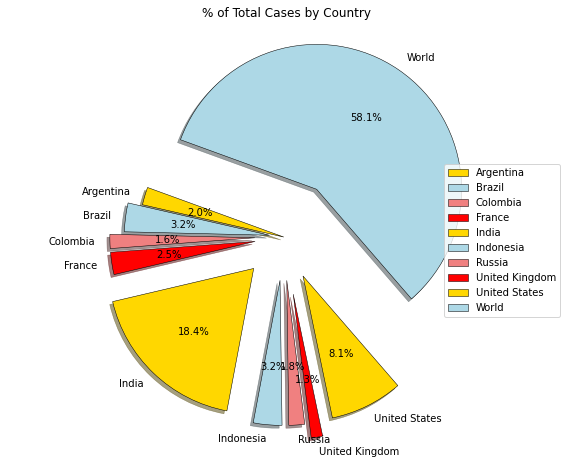

In [64]:
# Pie graph showing % of COVID-19 Cases per country
#
cases_count_sum = top_10_data_to_plot_df.groupby('location').sum()["new_cases"]

labels = cases_count_sum.index

plt.subplots(figsize = (10,8))

explode = (0.0, 0.1, 0.2, 0.2, 0.3, 0.3, 0.3, 0.4, 0.3, 0.4)

colors = ["gold", "lightblue", "lightcoral","red"]

plt.title('% of Total Cases by Country')
plt.axis('equal')

plt.pie(cases_count_sum, labels=labels, colors=colors, explode=explode, autopct="%1.1f%%",
        shadow=True, startangle=160, wedgeprops = {'linewidth': .5, 'edgecolor': 'black'})

plt.axis('equal')
plt.ylabel('')

plt.legend(loc="right")

plt.show()




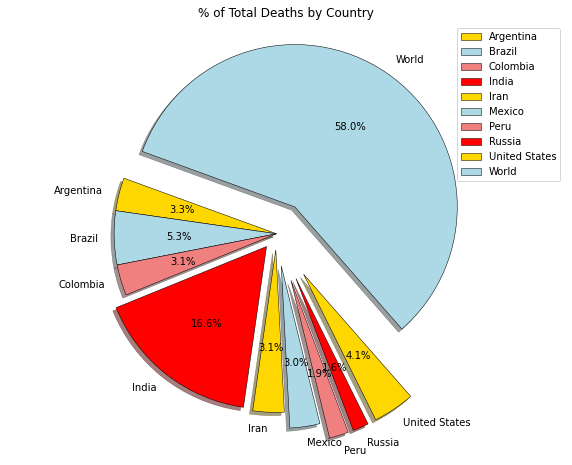

In [65]:
# Pie graph showing % of COVID-19 death per continent
#
deaths_count_sum = top_10_death_data_to_plot_df.groupby('location').sum()["new_deaths"]

labels = deaths_count_sum.index

plt.subplots(figsize = (10,8))

explode = (0, 0, 0, 0.1, 0.1, 0.2, 0.3, 0.3, 0.3, 0.2)

colors = ["gold", "lightblue", "lightcoral","red"]

plt.title('% of Total Deaths by Country')
plt.axis('equal')

plt.pie(deaths_count_sum, labels=labels, colors=colors, explode=explode, autopct="%1.1f%%",
        shadow=True, startangle=160, wedgeprops = {'linewidth': .5, 'edgecolor': 'black'})

plt.axis('equal')
plt.ylabel('')

plt.legend(loc="best")

plt.show()


In [49]:
# Function to creating linear regression and scatter plot
# Linear regression func
#
def linear_regress(x,y):
    print(f"The r-squared is : {round(st.pearsonr(x, y)[0],2)}")
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x, y)
    plt.plot(x,regress_values,"r-")
    return line_eq

# Fuction for annotating plot
#
def annotate_plt(line_eq, a, b):
    plt.annotate(line_eq,(a,b),fontsize=15,color="blue")
    

The r-squared is : 0.01


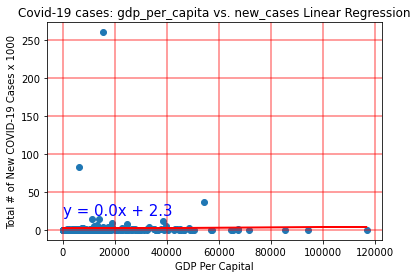

In [50]:
# Correlation of # of covid-19 cases with GDP per capita 
# Call function 
get_regress = linear_regress(total_cases_df_gdp["gdp_per_capita"],
                             total_cases_df_gdp["new_cases"]/1000)

# Call annotate func
annotate_plt(get_regress, 30, 20)

# Set a title
plt.title("Covid-19 cases: gdp_per_capita vs. new_cases Linear Regression")

# Set xlabel
plt.xlabel("GDP Per Capital")

# Set ylabel
plt.ylabel("Total # of New COVID-19 Cases x 1000")

# Set grid 
plt.grid(linestyle='-', linewidth=1.5, alpha = 0.5, color='r')

# Save the figure
plt.savefig("Covid-19-cases-gdp_per_capita-vs-new_cases-LinearRegression.png")


In [51]:
# Create dataframe for "cardiovasc_death_rate" per country
#
covid_data_clean_df_card = pd.DataFrame(covid_data_clean)
covid_data_clean_df_card = covid_data_clean_df_card.sort_values('location', ascending=True)

# Eleminate any duplicate entires for the county for "cardiovasc_death_rate" data
covid_data_clean_df_card = covid_data_clean_df_card.drop_duplicates(subset='location', 
                                                                    keep='first')
df_Cardio = covid_data_clean_df_card[['location','cardiovasc_death_rate']]

# DataFrame on country, new_cases, new_death and cardiovasc_death_rate to be used
# for co-relation 
#
total_cases_df_Cardio = pd.merge(total_cases_group_country, df_Cardio, 
                                 how="inner", on = "location")

# total_cases with cardiovasc_death_rate

total_cases_df_Cardio 

,location,new_cases,new_deaths,cardiovasc_death_rate
0,Afghanistan,0,0,597.029
1,Albania,106,2,304.195
2,Algeria,153,3,278.364
3,Andorra,0,0,109.135
4,Angola,82,4,276.045
...,...,...,...,...
203,Western Sahara,0,0,0.000
204,World,259936,3633,233.070
205,Yemen,1,0,495.003
206,Zambia,29,0,234.499


The r-squared is : 0.01


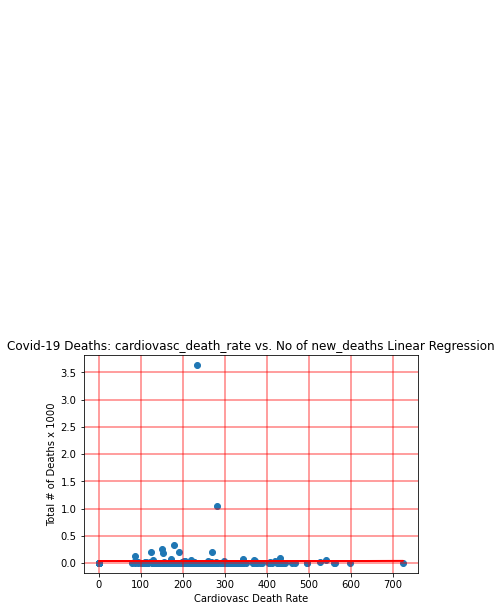

In [52]:
# Regression Analyis based on new_death vs cardiovasc_death_rate
#
# Correlation of # of covid-19 death with cardiovasc_death_rate
# Call function 
get_regress = linear_regress(total_cases_df_Cardio["cardiovasc_death_rate"],
                             total_cases_df_Cardio["new_deaths"]/1000)

# Call annotate func
annotate_plt(get_regress, 20, 10)

# Set a title
plt.title("Covid-19 Deaths: cardiovasc_death_rate vs. No of new_deaths Linear Regression")

# Set xlabel
plt.xlabel("Cardiovasc Death Rate")

# Set ylabel
plt.ylabel("Total # of Deaths x 1000")

# Set grid 
plt.grid(linestyle='-', linewidth=1.5, alpha = 0.5, color='r')

# Save the figure
plt.savefig("Covid-19-cardiovasc_death_rate-VS-COVID-new_deaths-LinearRegression.png")


In [53]:
# 
# DataFrame on country, new_cases, new_death and diabetes_prevalence to be used
# for co-relation 
#
df_diabetes_pre = covid_data_clean_df_card[['location','diabetes_prevalence']] 

# DataFrame on country, new_cases, new_death and cardiovasc_death_rate to be used
# for co-relation 
#
total_cases_df_diabetes_pre = pd.merge(total_cases_group_country, 
                                       df_diabetes_pre, how="inner", on = "location")

# total_cases with diabetes_prevalence

total_cases_df_diabetes_pre


,location,new_cases,new_deaths,diabetes_prevalence
0,Afghanistan,0,0,9.59
1,Albania,106,2,10.08
2,Algeria,153,3,6.73
3,Andorra,0,0,7.97
4,Angola,82,4,3.94
...,...,...,...,...
203,Western Sahara,0,0,0.00
204,World,259936,3633,8.51
205,Yemen,1,0,5.35
206,Zambia,29,0,3.94


The r-squared is : 0.04


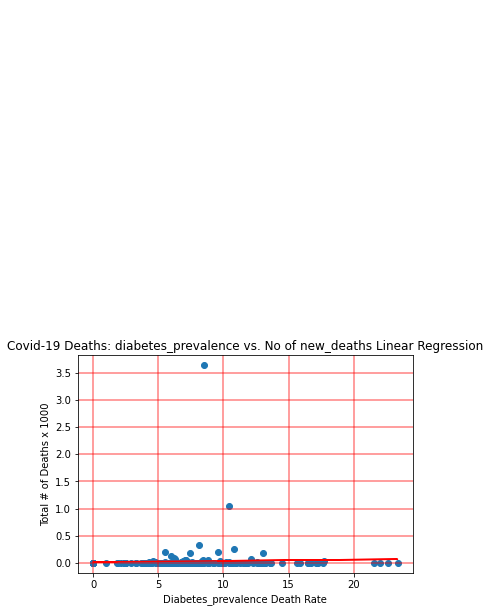

In [96]:
# 
# Regression Analyis based on new_death vs diabetes_prevalence
#
# Correlation of # of covid-19 death with diabetes_prevalence
# Call function 
get_regress = linear_regress(total_cases_df_diabetes_pre["diabetes_prevalence"],
                             total_cases_df_diabetes_pre["new_deaths"]/1000)

# Call annotate func
annotate_plt(get_regress, 20, 10)

# Set a title
plt.title("Covid-19 Deaths: diabetes_prevalence vs. No of new_deaths Linear Regression")

# Set xlabel
plt.xlabel("Diabetes_prevalence Death Rate")

# Set ylabel
plt.ylabel("Total # of Deaths x 1000")

# Set grid 
plt.grid(linestyle='-', linewidth=1.5, alpha = 0.5, color='r')

# Save the figure
plt.savefig("Covid-19-diabetes_prevalence-VS-COVID-new_deaths-LinearRegression.png")


In [24]:
#Correlation of # of covid-19 cases with population density 
#create graph 


In [25]:
#Correlation of total # of deaths with life expectancy 
#create graph 

In [26]:
#How many hospital beds per thousand available for each continent? 
#create graph 